In [1]:
import pandas as pd
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
directory = 'D:\PhD docs\ECE 5831- Pattern Recognition\project\data\data\A Trip'

dataframes = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, encoding='ISO-8859-1', delimiter=';')  # Adjust encoding and delimiter if needed
        dataframes.append(df)

# Concatenate all DataFrames into one
concatenated_df = pd.concat(dataframes, ignore_index=True)

columns_of_interest = ['Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [°C]', 
                       'Velocity [km/h]', 'Longitudinal Acceleration [m/s^2]', 'Elevation [m]', 'SoC [%]']

selected_data = concatenated_df[columns_of_interest]

random_sample = selected_data.sample(n=20000, random_state=1) 



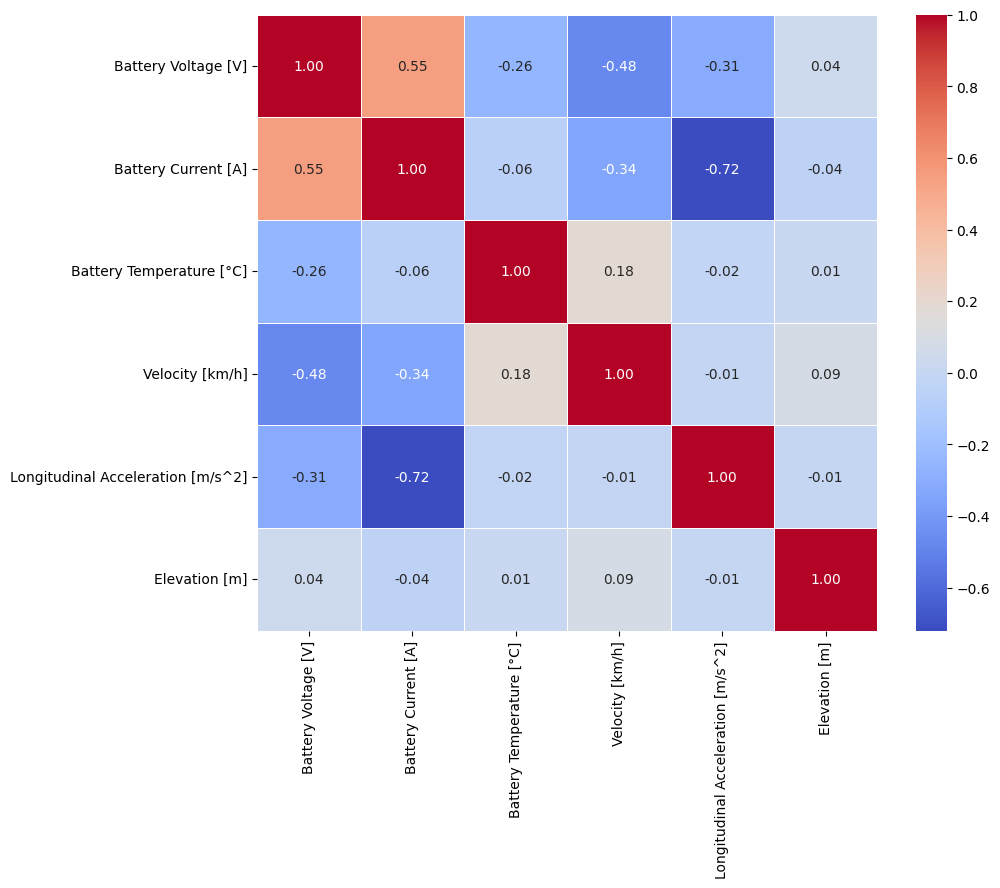

In [3]:

# Calculating the correlation matrix
data_corr = random_sample.drop('SoC [%]', axis=1)
correlation_matrix = data_corr.corr()

plt.figure(figsize=(10, 8))

# Drawing the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()


In [4]:
data = random_sample

# Split the dataset into features (X) and target variable (y)
X = data.iloc[:, :6].values 
y = data.iloc[:, 6:].values 

# Normalize the input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) 

In [5]:

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape=(6,), activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

# Define a custom optimizer with a specific learning rate (e.g., 0.001)
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)

# Compile the model with the custom optimizer
model.compile(optimizer=custom_optimizer, loss='mean_squared_error', metrics=['mae'])

# Train the model and save the history, including the validation data
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')




Epoch 1/100


438/438 [==============================] - 2s 3ms/step - loss: 799.3430 - mae: 16.7139 - val_loss: 21.7813 - val_mae: 3.5138
Epoch 2/100
438/438 [==============================] - 1s 3ms/step - loss: 8.7067 - mae: 2.1282 - val_loss: 4.5906 - val_mae: 1.5555
Epoch 3/100
438/438 [==============================] - 1s 3ms/step - loss: 3.5821 - mae: 1.4437 - val_loss: 3.1207 - val_mae: 1.3554
Epoch 4/100
438/438 [==============================] - 1s 2ms/step - loss: 3.0219 - mae: 1.3573 - val_loss: 3.1809 - val_mae: 1.3694
Epoch 5/100
438/438 [==============================] - 1s 3ms/step - loss: 2.8750 - mae: 1.3300 - val_loss: 2.5729 - val_mae: 1.2476
Epoch 6/100
438/438 [==============================] - 1s 2ms/step - loss: 2.7572 - mae: 1.3030 - val_loss: 2.5609 - val_mae: 1.2490
Epoch 7/100
438/438 [==============================] - 1s 3ms/step - loss: 2.7074 - mae: 1.2885 - val_loss: 2.7536 - val_mae: 1.3092
Epoch 8/100
438/438 [==============================] - 1s 3ms/

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                140       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 411 (1.61 KB)
Trainable params: 411 (1.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


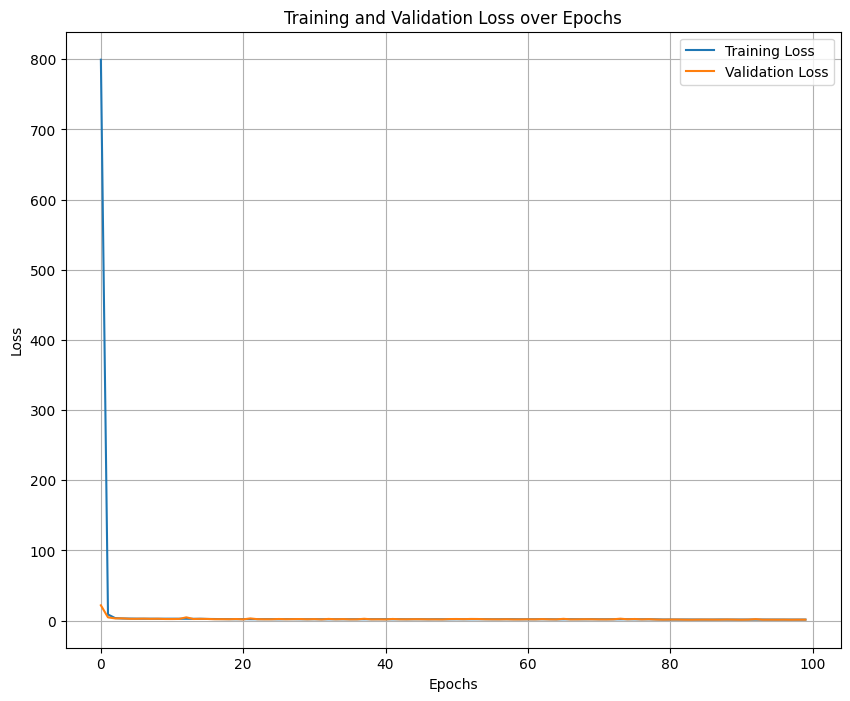

In [7]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
import random

# Select 50 random samples from the test set and predictions
num_samples = 50
sample_indices = random.sample(range(len(y_test)), num_samples)
y_test_samples = y_test[sample_indices]
y_pred_samples = y_pred[sample_indices]


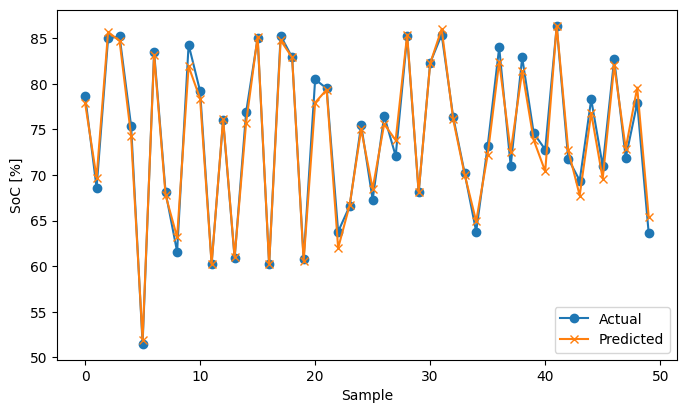

In [9]:
# Plotting
plt.figure(figsize=(8, 10))

# Plot for label 1
plt.subplot(2, 1, 1)
plt.plot(y_test_samples, label='Actual', marker='o')
plt.plot(y_pred_samples, label='Predicted', marker='x')
# plt.title('Predicted vs Actual Values for $I_1$')
plt.xlabel('Sample')
plt.ylabel(r"SoC [%]")
plt.legend()